#Verify Environment

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Common Imports

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use('seaborn')

In [4]:
import seaborn as sns
sns.set()

In [5]:
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_colwidth', 199) 

#Check Data

In [6]:
diabetes_data = pd.read_csv("./diabetes.csv")

In [7]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes_data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


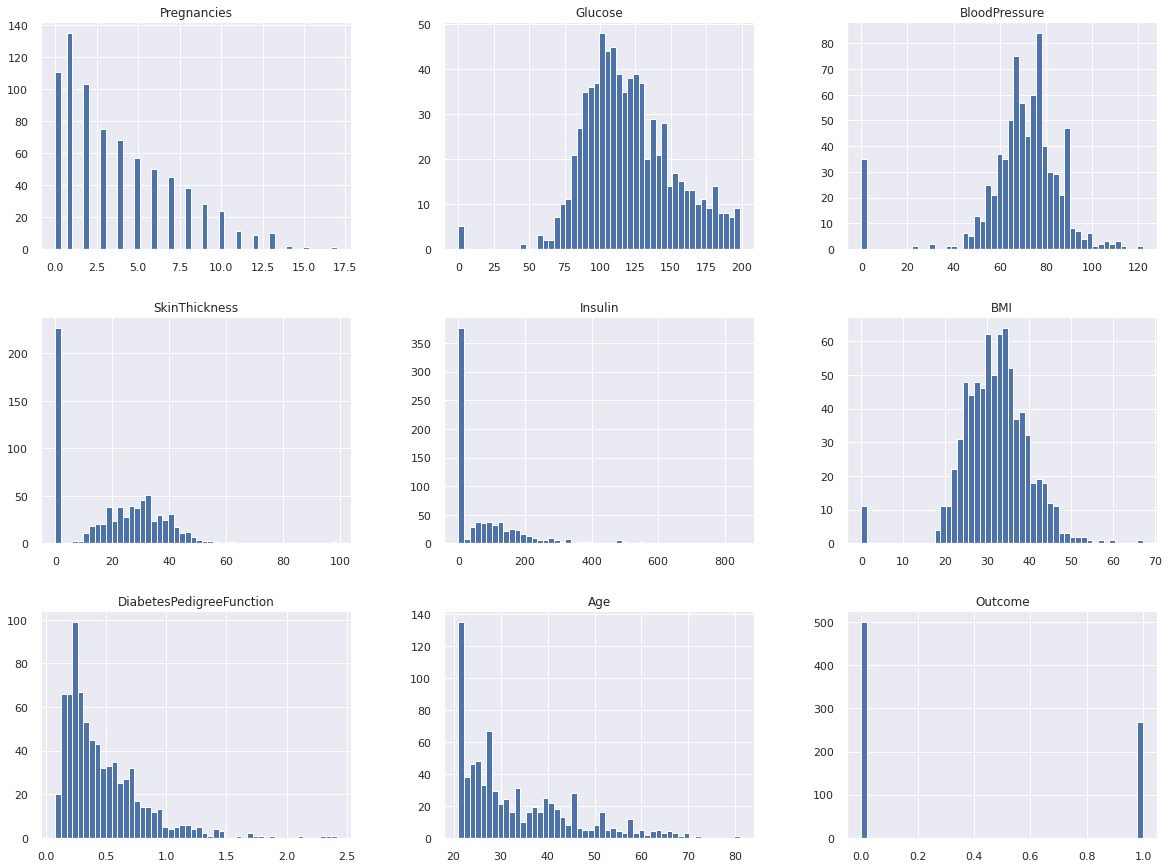

In [11]:
diabetes_data.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
#Find total number of zeros
# Count number of zeros in all columns of Dataframe
for column_name in diabetes_data.columns:
    column = diabetes_data[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column', column_name, ' is : ', count)

Count of zeros in column Pregnancies  is :  111
Count of zeros in column Glucose  is :  5
Count of zeros in column BloodPressure  is :  35
Count of zeros in column SkinThickness  is :  227
Count of zeros in column Insulin  is :  374
Count of zeros in column BMI  is :  11
Count of zeros in column DiabetesPedigreeFunction  is :  0
Count of zeros in column Age  is :  0
Count of zeros in column Outcome  is :  500


In [13]:
corr_matrix = diabetes_data.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

#Stratified data split

In [14]:
#TEMPLATE - prepare X & y
X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data.Outcome

In [15]:
#TEMPLATE - create a stratified split
from sklearn.model_selection import train_test_split
X_train_raw,X_test_raw,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)
#total rows: 768
#train set: 614
  #train set: 491
  #validation set: 123
#test set: 154

In [16]:
feature_names = list(diabetes_data.columns[:-1])
feature_target = list(diabetes_data.columns[-1:])

In [17]:
#TEMPLATE - verifying its a stratified split
def outcome_cat_proportions(data):
  return data.value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": outcome_cat_proportions(diabetes_data["Outcome"]),
    "Train data": outcome_cat_proportions(y_train),
    "Test data": outcome_cat_proportions(y_test)
})
compare_props

,Overall,Train data,Test data
0,0.651042,0.651466,0.649351
1,0.348958,0.348534,0.350649


# Train Data cleaning

In [18]:
#TEMPLATE - cleaning remove zeros - replace with NaN
X_train = X_train_raw.copy(deep = True)

In [19]:

#TEMPLATE - copy new dataframe values
X_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [20]:
#replace na with mean() & Median()
X_train['Glucose'].fillna(X_train['Glucose'].mean(), inplace = True)
X_train['BloodPressure'].fillna(X_train['BloodPressure'].mean(), inplace = True)
X_train['SkinThickness'].fillna(X_train['SkinThickness'].median(), inplace = True)
X_train['Insulin'].fillna(X_train['Insulin'].median(), inplace = True)
X_train['BMI'].fillna(X_train['BMI'].median(), inplace = True)

In [21]:
#scale the inputs
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train =  pd.DataFrame(sc_X.fit_transform(X_train,),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

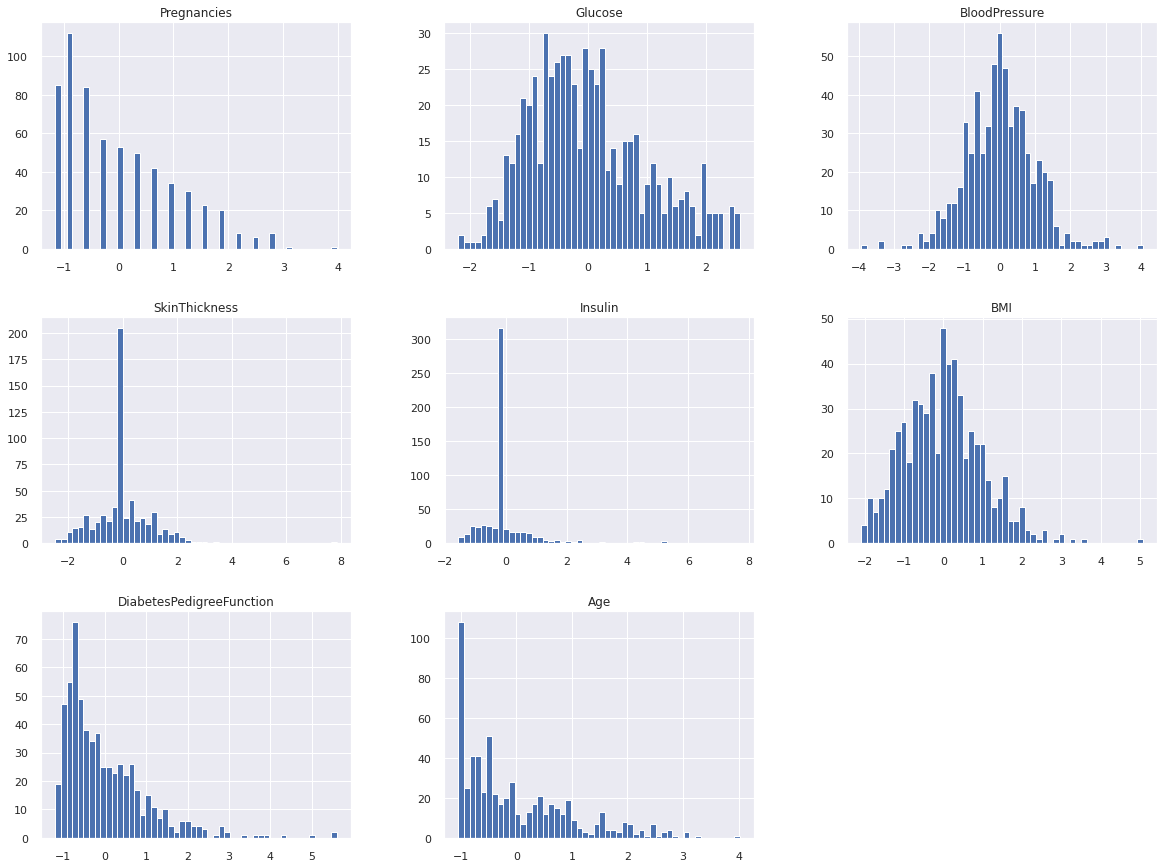

In [22]:
#show histogram without zeros
X_train.hist(bins=50, figsize=(20,15))
plt.show()

#Test Data Cleaning

In [23]:
#TEMPLATE - cleaning remove zeros - replace with NaN
X_test = X_test_raw.copy(deep = True)
#TEMPLATE - copy new dataframe values
X_test[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_test[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [24]:
#replace na with mean() & Median()
X_test['Glucose'].fillna(X_test['Glucose'].mean(), inplace = True)
X_test['BloodPressure'].fillna(X_test['BloodPressure'].mean(), inplace = True)
X_test['SkinThickness'].fillna(X_test['SkinThickness'].median(), inplace = True)
X_test['Insulin'].fillna(X_test['Insulin'].median(), inplace = True)
X_test['BMI'].fillna(X_test['BMI'].median(), inplace = True)

In [25]:
#scale the inputs
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_test =  pd.DataFrame(sc_X.fit_transform(X_test,),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Random search
Random search to find hyper parameters which may possibly work for further fine tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint,uniform
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
#               "base_estimator__splitter" :   ["best", "random"],
#               "n_estimators": [1, 2]
#              }

param_distribs = {
        'n_estimators': randint(low=1, high=100),
        'learning_rate': uniform(0.001, 1.00),
    }

ada_cfl = AdaBoostClassifier(DecisionTreeClassifier(random_state=42,max_depth=1))
rnd_search = RandomizedSearchCV(ada_cfl, param_distributions=param_distribs,
                                n_iter=100, cv=5, scoring='f1_weighted', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                                                      random_state=42)),
                   n_iter=100,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5014388410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5014388890>},
                   random_state=42, scoring='f1_weighted')

In [ ]:
rnd_search_df = pd.DataFrame({'param': rnd_search.cv_results_["params"], 'f1_weighted': rnd_search.cv_results_["mean_test_score"]})
rnd_search_df.sort_values(by=['f1_weighted'], ascending=False)

,param,f1_weighted
32,"{'learning_rate': 0.7282719958564209, 'n_estimators': 15}",0.772651
63,"{'learning_rate': 0.6054173792778172, 'n_estimators': 15}",0.772390
55,"{'learning_rate': 0.7227295211648732, 'n_estimators': 14}",0.772059
5,"{'learning_rate': 0.6518884729488529, 'n_estimators': 53}",0.768320
50,"{'learning_rate': 0.6698412526636073, 'n_estimators': 37}",0.767162
48,"{'learning_rate': 0.6242981268275579, 'n_estimators': 34}",0.761763
60,"{'learning_rate': 0.6374104112637804, 'n_estimators': 52}",0.761176
70,"{'learning_rate': 0.8046720768991145, 'n_estimators': 44}",0.761140
96,"{'learning_rate': 0.6345297107608947, 'n_estimators': 11}",0.760672
27,"{'learning_rate': 0.4261558744912447, 'n_estimators': 54}",0.759985


In [ ]:
rnd_search.best_estimator_.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=42),
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 1,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': 42,
 'base_estimator__splitter': 'best',
 'learning_rate': 0.7282719958564209,
 'n_estimators': 15,
 'random_state': None}

# Grid search - Linear SVC

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC


param_grid = [
    # try combinations of depth starting at 2
    # {'C': [np.arange(0.60, .80, 0.02)], 'n_estimators': list(range(5,60))}
    {'C': np.arange(0.1, 1, .1)}
  ]

lin_svc = LinearSVC(random_state=42,loss='hinge')
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(lin_svc, param_grid, cv=5,
                           scoring='f1_weighted',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

GridSearchCV(cv=5, estimator=LinearSVC(loss='hinge', random_state=42),
             param_grid=[{'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}],
             return_train_score=True, scoring='f1_weighted')

In [145]:
grid_search_df = pd.DataFrame({'param': grid_search.cv_results_["params"], 'f1_weighted': grid_search.cv_results_["mean_test_score"]})
grid_search_df.sort_values(by=['f1_weighted'], ascending=False)
#{'C': 5, 'gamma': 0.005500000000000001}	0.77698
# {'C': 5, 'gamma': 0.006000000000000002}	0.777023
# {'C': 5, 'gamma': 0.006}	0.777023

,param,f1_weighted
2,{'C': 0.30000000000000004},0.768222
1,{'C': 0.2},0.766380
3,{'C': 0.4},0.766311
4,{'C': 0.5},0.766311
7,{'C': 0.8},0.764852
0,{'C': 0.1},0.764413
6,{'C': 0.7000000000000001},0.763337
8,{'C': 0.9},0.763337
5,{'C': 0.6},0.761854


# Grid search - RBF
Grid search to find best parameters


In [138]:
np.arange(0.001, 0.010, 0.001)

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009])

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = [
    # try combinations of depth starting at 2
    # {'C': [np.arange(0.60, .80, 0.02)], 'n_estimators': list(range(5,60))}
    {'C': np.arange(1, 10, 1),'gamma': np.arange(0.001, 0.010, 0.001)}
  ]

rbf_svc = SVC(kernel="rbf",random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(rbf_svc, param_grid, cv=5,
                           scoring='f1_weighted',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid=[{'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'gamma': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009])}],
             return_train_score=True, scoring='f1_weighted')

In [140]:
grid_search_df = pd.DataFrame({'param': grid_search.cv_results_["params"], 'f1_weighted': grid_search.cv_results_["mean_test_score"]})
grid_search_df.sort_values(by=['f1_weighted'], ascending=False)
#{'C': 5, 'gamma': 0.005500000000000001}	0.77698
# {'C': 5, 'gamma': 0.006000000000000002}	0.777023
# {'C': 5, 'gamma': 0.006}	0.777023

,param,f1_weighted
41,"{'C': 5, 'gamma': 0.006}",0.777023
49,"{'C': 6, 'gamma': 0.005}",0.773624
75,"{'C': 9, 'gamma': 0.004}",0.773624
58,"{'C': 7, 'gamma': 0.005}",0.773259
25,"{'C': 3, 'gamma': 0.008}",0.771779
33,"{'C': 4, 'gamma': 0.007}",0.771777
66,"{'C': 8, 'gamma': 0.004}",0.771754
40,"{'C': 5, 'gamma': 0.005}",0.771646
32,"{'C': 4, 'gamma': 0.006}",0.771646
57,"{'C': 7, 'gamma': 0.004}",0.771338


In [141]:
grid_search.best_estimator_.get_params()

{'C': 5,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.006,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#Run Best Estimator

In [27]:
from sklearn.svm import SVC
#Based on grid search define best estimator for generating learning curves, confusion matrix & for final predict()
# {'learning_rate': 0.64, 'n_estimators': 46}
best_estimator = SVC(kernel="rbf",random_state=42,C=5,gamma=0.006)
best_est_title = 'RBF | C:5, gamma:0.006'

# Learning Curve
Based on grid search define best estimator for generating learning curves, confusion matrix & for final predict()

In [28]:
from sklearn.model_selection import learning_curve

def learning_curves(estimator, data, features, y, cv,title):
   plt.figure(figsize = (16,5))
   tot_col = 2
  #call learning curve function
   train_sizes, train_scores, validation_scores,fit_times, _ = learning_curve(estimator, data[features], y, cv = cv, scoring = 'f1_weighted', shuffle=True,return_times=True)
   #find the mean values
   train_scores_mean = train_scores.mean(axis = 1)
   validation_scores_mean = validation_scores.mean(axis = 1)
   fit_times_mean = fit_times.mean(axis = 1)
   #Plot-1 - Learning Curve: training error and validation error   
   plt.subplot(1,tot_col,(1))
   plt.plot(train_sizes, train_scores_mean, "o-", label = 'Training score')
   plt.plot(train_sizes, validation_scores_mean, "o-", label = 'Validation score')
   plt.ylabel('f1 weighted', fontsize = 14)
   plt.xlabel('Training set size', fontsize = 14)
  #  title = 'Learning curves for ' +  title
   plt.title(title, fontsize = 18, y = 1.03)
   plt.legend()
   plt.ylim(0,1.10)

   #Plot-2 - Scalability of the model - Plot n_samples vs fit_times
   plt.subplot(1,tot_col,(2))
   plt.plot(train_sizes, fit_times_mean, "o-", label = 'Training fit-times')
   plt.ylabel('fit_times', fontsize = 14)
   plt.xlabel('Training set size', fontsize = 14)
   plt.title("Scalability of the model", fontsize = 18, y = 1.03)
   plt.legend()
   plt.savefig('learning_curves.pdf')  
  #  plt.ylim(*ylim)
  

  #  #Plot-3 - Performance of the model - Plot fit_time vs score
  #  fit_time_argsort = fit_times_mean.argsort()
  #  fit_time_sorted = fit_times_mean[fit_time_argsort]
  #  validation_scores_mean_sorted = validation_scores_mean[fit_time_argsort]
  # #  test_scores_std_sorted = test_scores_std[fit_time_argsort]
  #  plt.subplot(1,tot_col,(3))
  #  plt.plot(fit_time_sorted, validation_scores_mean_sorted)
  #  plt.ylabel('fit_times', fontsize = 14)
  #  plt.xlabel('Score', fontsize = 14)
  #  plt.title("Performance of the model", fontsize = 18, y = 1.03)
  #  plt.legend()
  #  plt.ylim(*ylim)

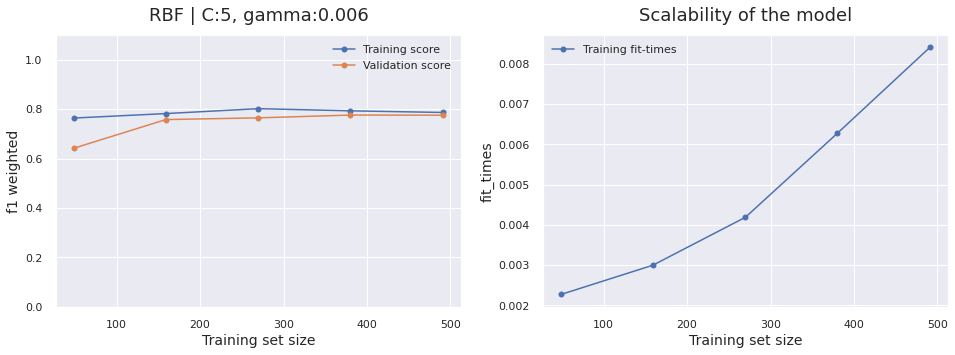

In [29]:
#run learning_curves
learning_curves(best_estimator, X_train, feature_names, y_train, 5,best_est_title)

# Confusion Matrix, Precisioin & Recall

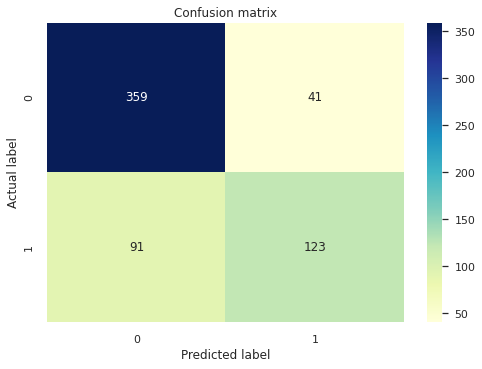

In [30]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

y_train_pred = cross_val_predict(best_estimator,X_train,y_train, cv=5)
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix.pdf')  

In [31]:
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred,average='weighted')

0.7771208374772276

In [32]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train,y_train_pred)

0.75

In [33]:
recall_score(y_train,y_train_pred)

0.5747663551401869

# Classification Report

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       400
           1       0.75      0.57      0.65       214

    accuracy                           0.79       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.79      0.78       614



## Compare Kernels

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# lin_svc = LinearSVC(random_state=42,loss='hinge')
lin_svc = SVC(kernel="linear",random_state=42)
poly_svc = SVC(kernel="poly",random_state=42, degree=3)
sigmoid_svc = SVC(kernel="sigmoid",random_state=42)
rbf_svc = SVC(kernel="rbf",random_state=42)
class_objects = [poly_svc,sigmoid_svc,rbf_svc,lin_svc]
class_names = ['poly','sigmoid','RBF','linear']
class_scores = []


for classifier, name in zip(class_objects,class_names):
  scores = cross_val_score(classifier, X_train, y_train, scoring='f1_weighted',cv=5)
  class_scores.append(scores.mean())

class_scores

[0.6909651712089779,
 0.7183248441460913,
 0.7594453829028789,
 0.7629702657195562]

(0.6, 0.8)

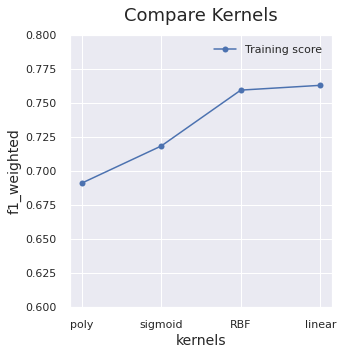

In [29]:
#View kernel scores
plt.figure(figsize = (16,5))
plt.subplot(1,3,1)

plt.plot(class_names, class_scores,"o-", label = 'Training score')
   # provide x & y labels
plt.ylabel('f1_weighted', fontsize = 14)
plt.xlabel('kernels', fontsize = 14)
title =  "Compare Kernels"
plt.title(title, fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,0.8)

# Validation Curve
generate validation curve to develop intuition for analysis

In [30]:
from sklearn.model_selection import validation_curve

def validation_curves(estimator, title, data, features, y,param_name, xax_param_name, param_range,invert_axis,xscale,ylimt):
   #call valiidation curve function
   train_scores, validation_scores = validation_curve(estimator, data[features], y, param_name=param_name, param_range=param_range, cv = 5, scoring = 'f1_weighted')
   train_scores_mean = train_scores.mean(axis = 1)
   validation_scores_mean = validation_scores.mean(axis = 1)
   #Plot training error and validation error   
   plt.plot(param_range, train_scores_mean,label = 'Training score')
   plt.plot(param_range, validation_scores_mean, label = 'Validation score')
   # provide x & y labels
   plt.ylabel('f1_weighted', fontsize = 14)
   plt.xlabel(xax_param_name, fontsize = 14)
   ax = plt.gca()
   if xscale == 'log':
     ax.set_xscale('log')
   if invert_axis:
     ax.invert_xaxis()
   plt.title(title, fontsize = 18, y = 1.03)
   plt.legend()
   plt.ylim(ylimt[0],ylimt[1])



In [175]:
np.logspace(-4, 2, 5)

array([1.00000000e-04, 3.16227766e-03, 1.00000000e-01, 3.16227766e+00,
       1.00000000e+02])

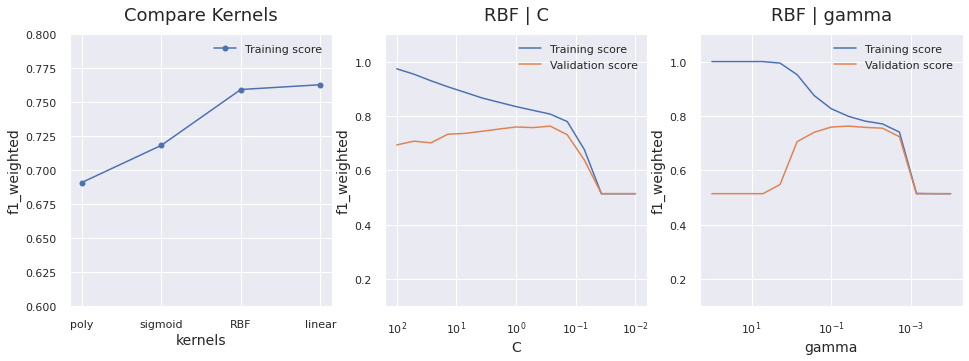

In [33]:
#execute validation curves
plt.figure(figsize = (16,5))

#plot comparision of kernels
plt.subplot(1,3,1)

plt.plot(class_names, class_scores,"o-", label = 'Training score')
   # provide x & y labels
plt.ylabel('f1_weighted', fontsize = 14)
plt.xlabel('kernels', fontsize = 14)
title =  "Compare Kernels"
plt.title(title, fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,0.8)


#Generate validation curves

rbf_svc = SVC(kernel="rbf",random_state=42)

for model, title, param_name, xax_param_name, param_range,i,invert_axis,xscale,ylimt in [(rbf_svc,"RBF | C", "C", "C", np.logspace(-2, 2, 15), 0,True,"log",(0.1,1.10)),(rbf_svc,"RBF | gamma", "gamma", "gamma", np.logspace(-4, 2, 15), 1,True,"log",(0.1,1.10))]:
    plt.subplot(1,3,(i+1+1))
    validation_curves(model, title, X_train, feature_names, y_train, param_name, xax_param_name, param_range,invert_axis,xscale,ylimt)
plt.savefig('validation_curves.pdf')

#Test set prediction

In [42]:
#fit the best model
best_estimator.fit(X_train,y_train)

SVC(C=5, gamma=0.006, random_state=42)

In [184]:
#use the model to predict
y_test_pred = best_estimator.predict(X_test)

In [185]:
#calculate weighted f1 score weighted
from sklearn.metrics import f1_score
f1_score(y_test,y_test_pred,average='weighted')

0.691083680470473

In [186]:
precision_score(y_test,y_test_pred)

0.5952380952380952

In [187]:
recall_score(y_test,y_test_pred)

0.46296296296296297

#References


*   How to support Support vector kernels: https://www.kdnuggets.com/2016/06/select-support-vector-machine-kernels.html